<a href="https://colab.research.google.com/github/Aswinramesh04/100-Days-of-DataScience/blob/main/E4W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings

import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/content/car.csv')

In [4]:
df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating
0,Need to improve body style.It's amazing and dr...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
1,"Tata EV has lot of flaws, worst part is servic...",3.0,2.0,1.0,2.0,1.0,New,Few thousand kilometers,0.0
2,"Very nice car , environmental friendly i like ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
3,Company did not provide slow charging station ...,2.0,2.0,1.0,1.0,1.0,New,Haven't driven it,0.0
4,Servicing and maintenance overall good and goo...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Few hundred kilometers,5.0


In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
dtypes: float64(6), object(3)
memory usage: 9.2+ KB


In [7]:
df.head(10)

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating
0,Need to improve body style.It's amazing and dr...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
1,"Tata EV has lot of flaws, worst part is servic...",3.0,2.0,1.0,2.0,1.0,New,Few thousand kilometers,0.0
2,"Very nice car , environmental friendly i like ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
3,Company did not provide slow charging station ...,2.0,2.0,1.0,1.0,1.0,New,Haven't driven it,0.0
4,Servicing and maintenance overall good and goo...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Few hundred kilometers,5.0
5,Don't buy & it's a very costly car. Not the be...,1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0
6,"Nice car, amazing performance and good smooth ...",5.0,5.0,5.0,5.0,5.0,Used,Few thousand kilometers,5.0
7,"It's a 5 seater Electric car, It has multifunc...",5.0,5.0,5.0,5.0,5.0,Not Purchased,Haven't driven it,5.0
8,"Cost of car is not high. lookwise attractive, ...",5.0,5.0,5.0,5.0,5.0,Not Purchased,Haven't driven it,5.0
9,"Pros- Super cool to drive,per km cost quite lo...",4.0,5.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0


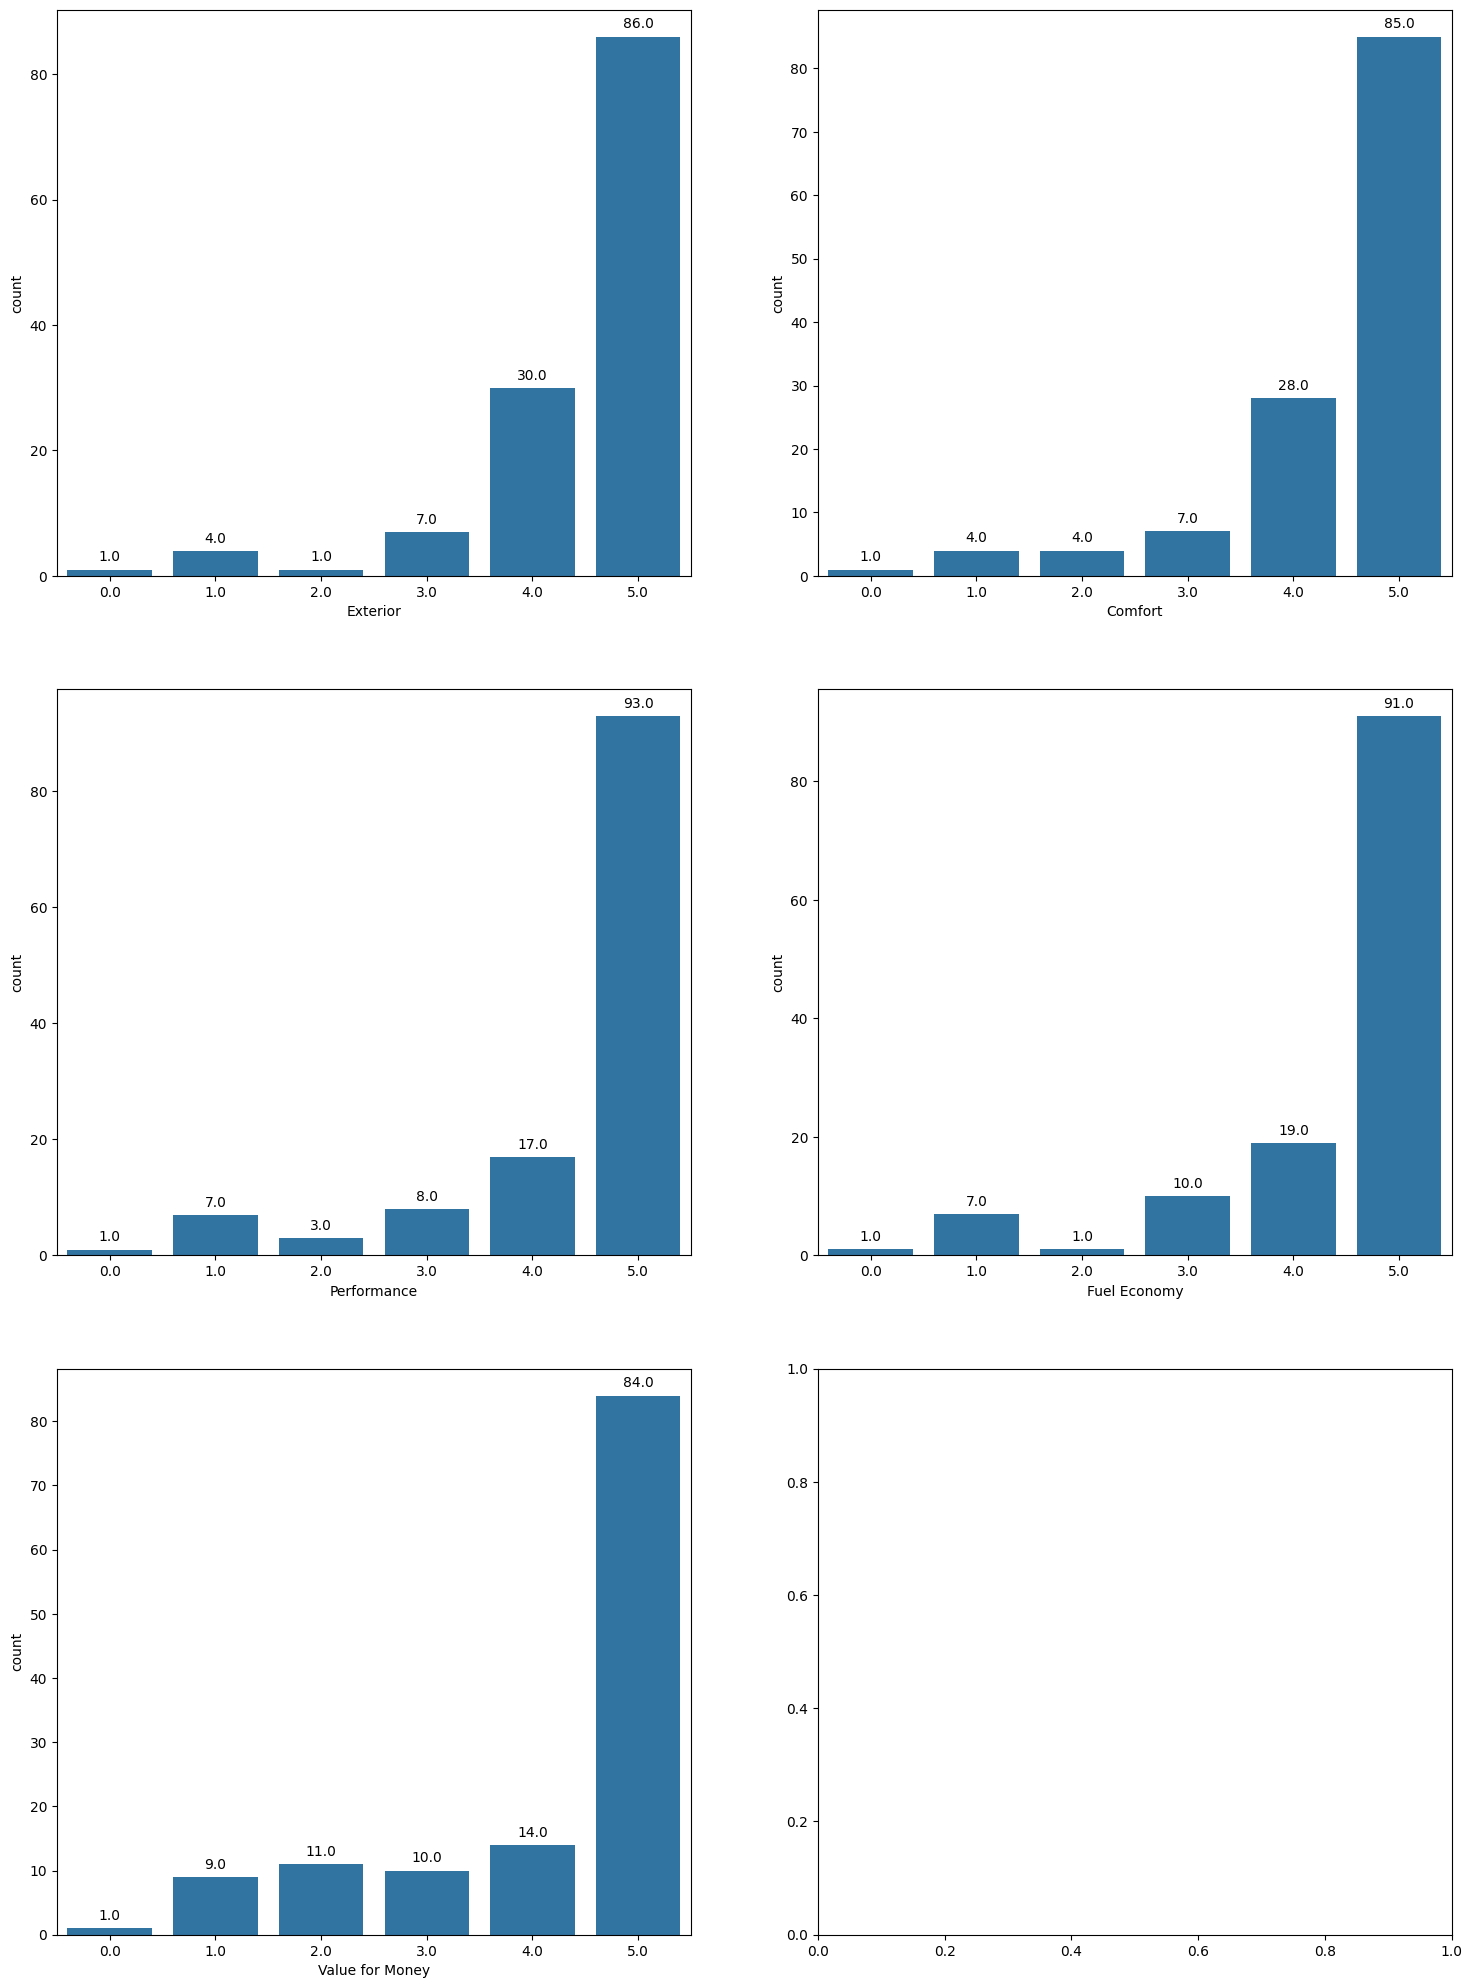

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 25))
splot = sns.countplot(data = df,x='Exterior', ax=axes[0][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Comfort', ax=axes[0][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Performance', ax=axes[1][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Fuel Economy', ax=axes[1][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')


splot = sns.countplot(data = df,x='Value for Money', ax=axes[2][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

**Conclusions**

* People concerns for EV's are regarding Exterior Comfort Performance and Fuel Economy.

* People seem to be very postive about every aspect of EV's

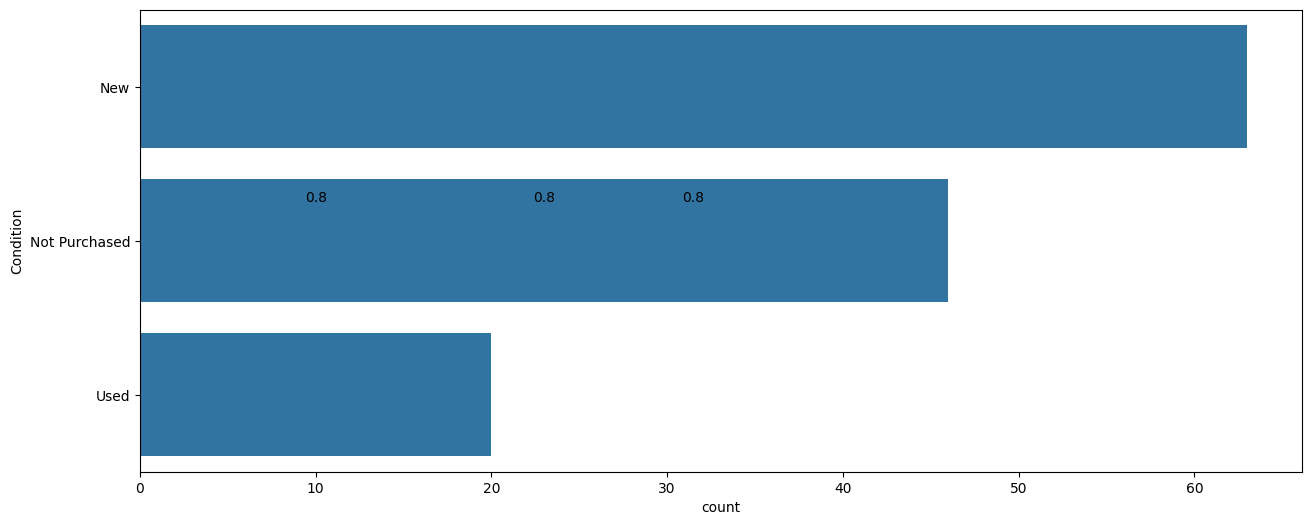

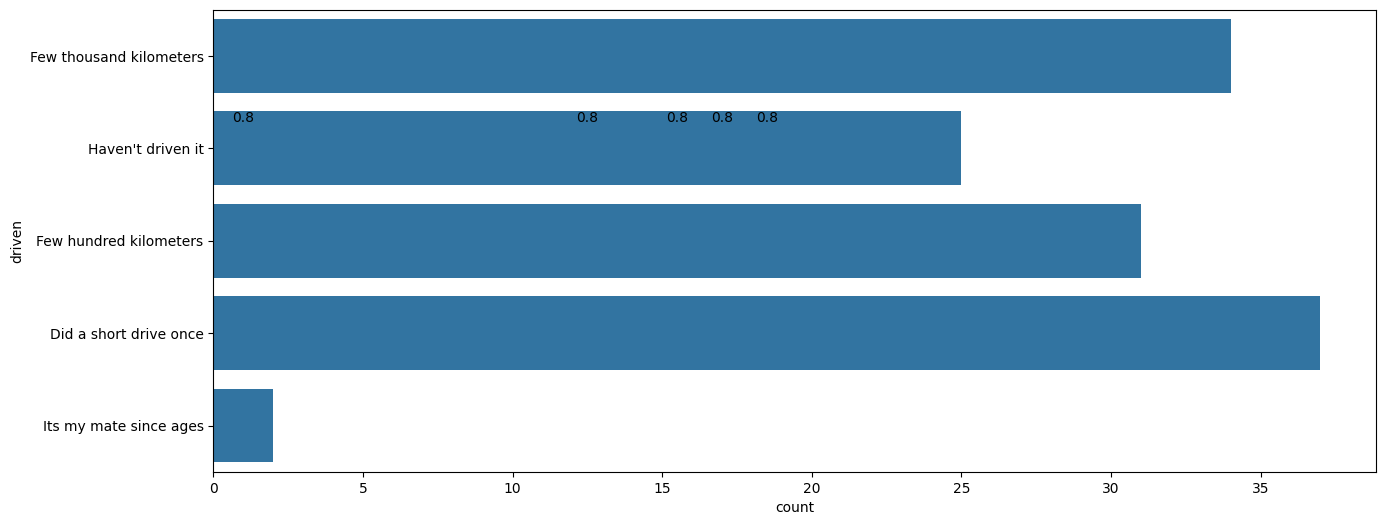

In [9]:
for col in df.columns[-3:-1].values:
    plt.figure(figsize=(15, 6))
    splot = sns.countplot(df[col])
    for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')
    plt.show(block=False)

## Step 2: Specifying the Ideal Target Segment

<Axes: xlabel='count', ylabel='driven'>

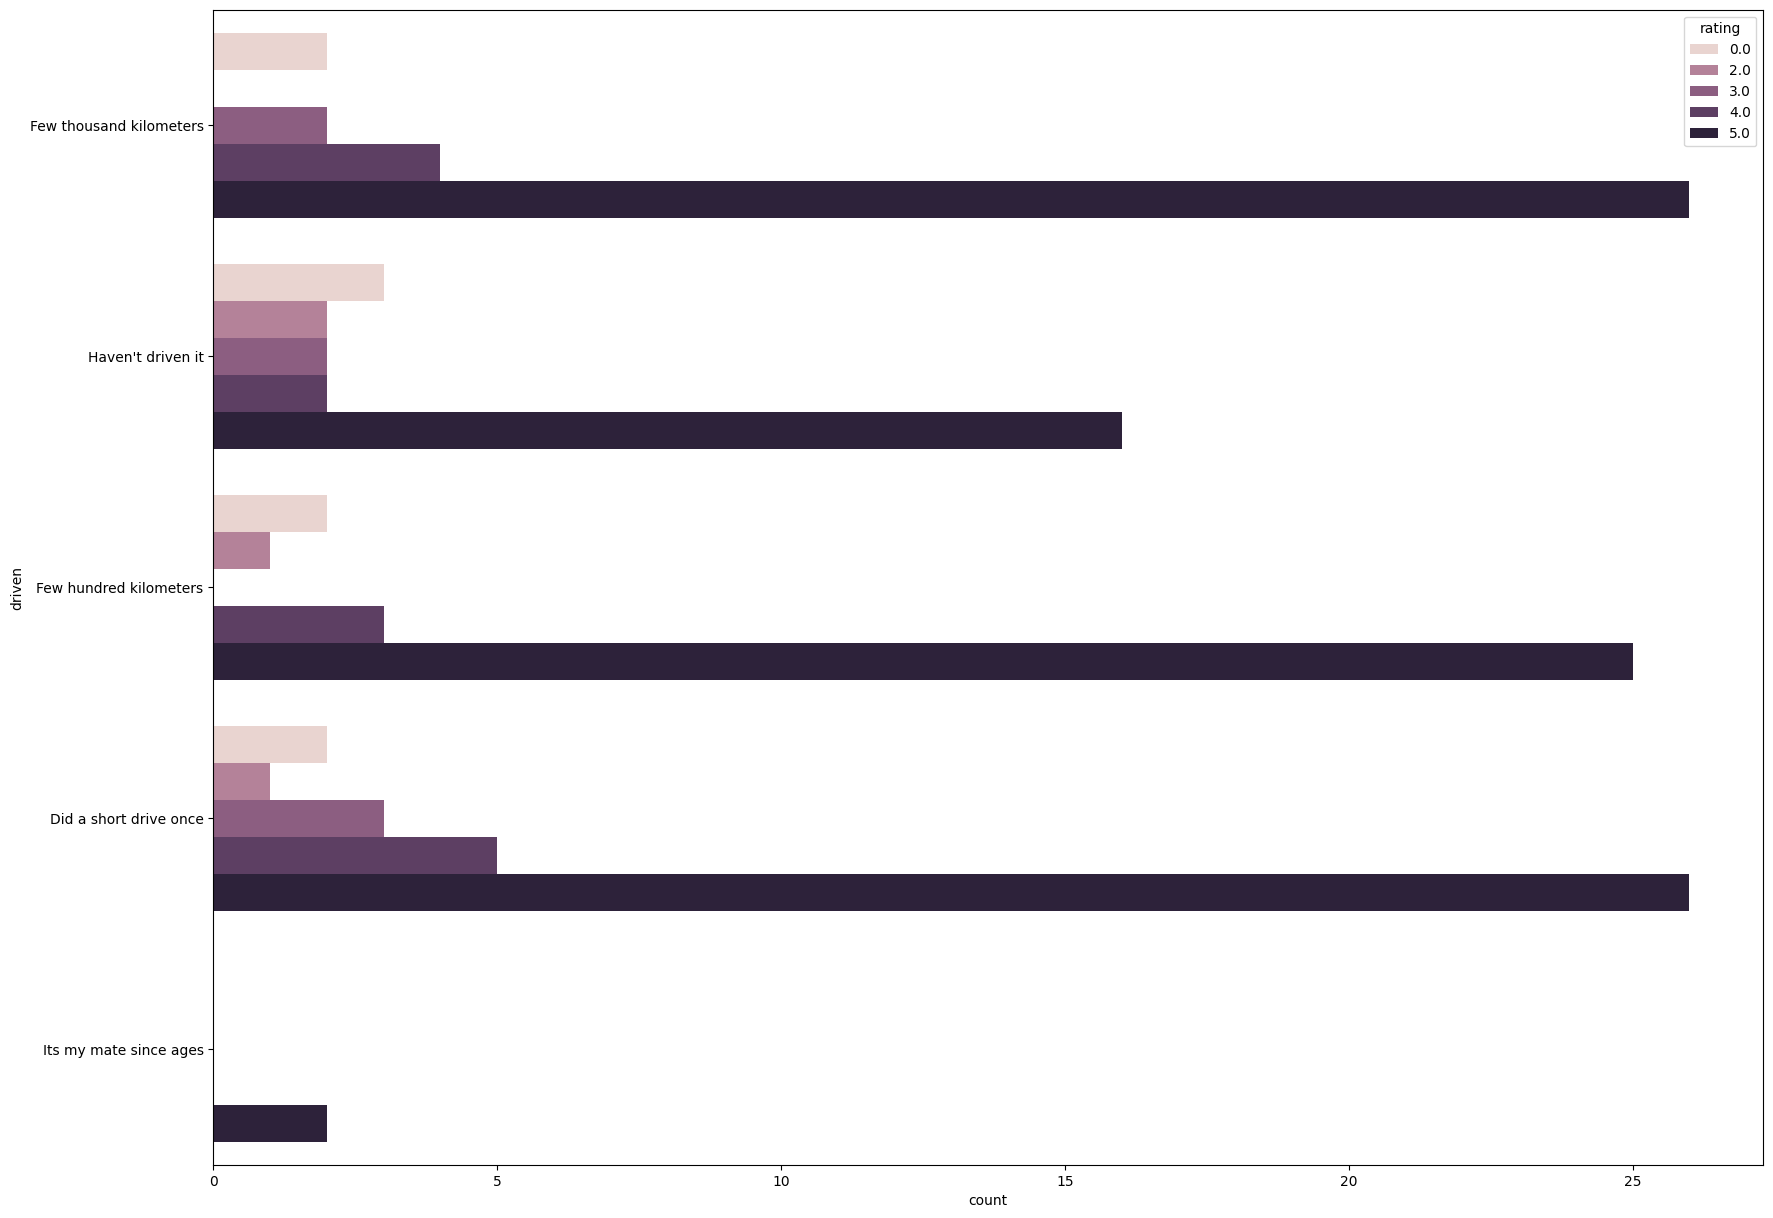

In [10]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='driven', data = df, hue='rating')

<Axes: xlabel='count', ylabel='Condition'>

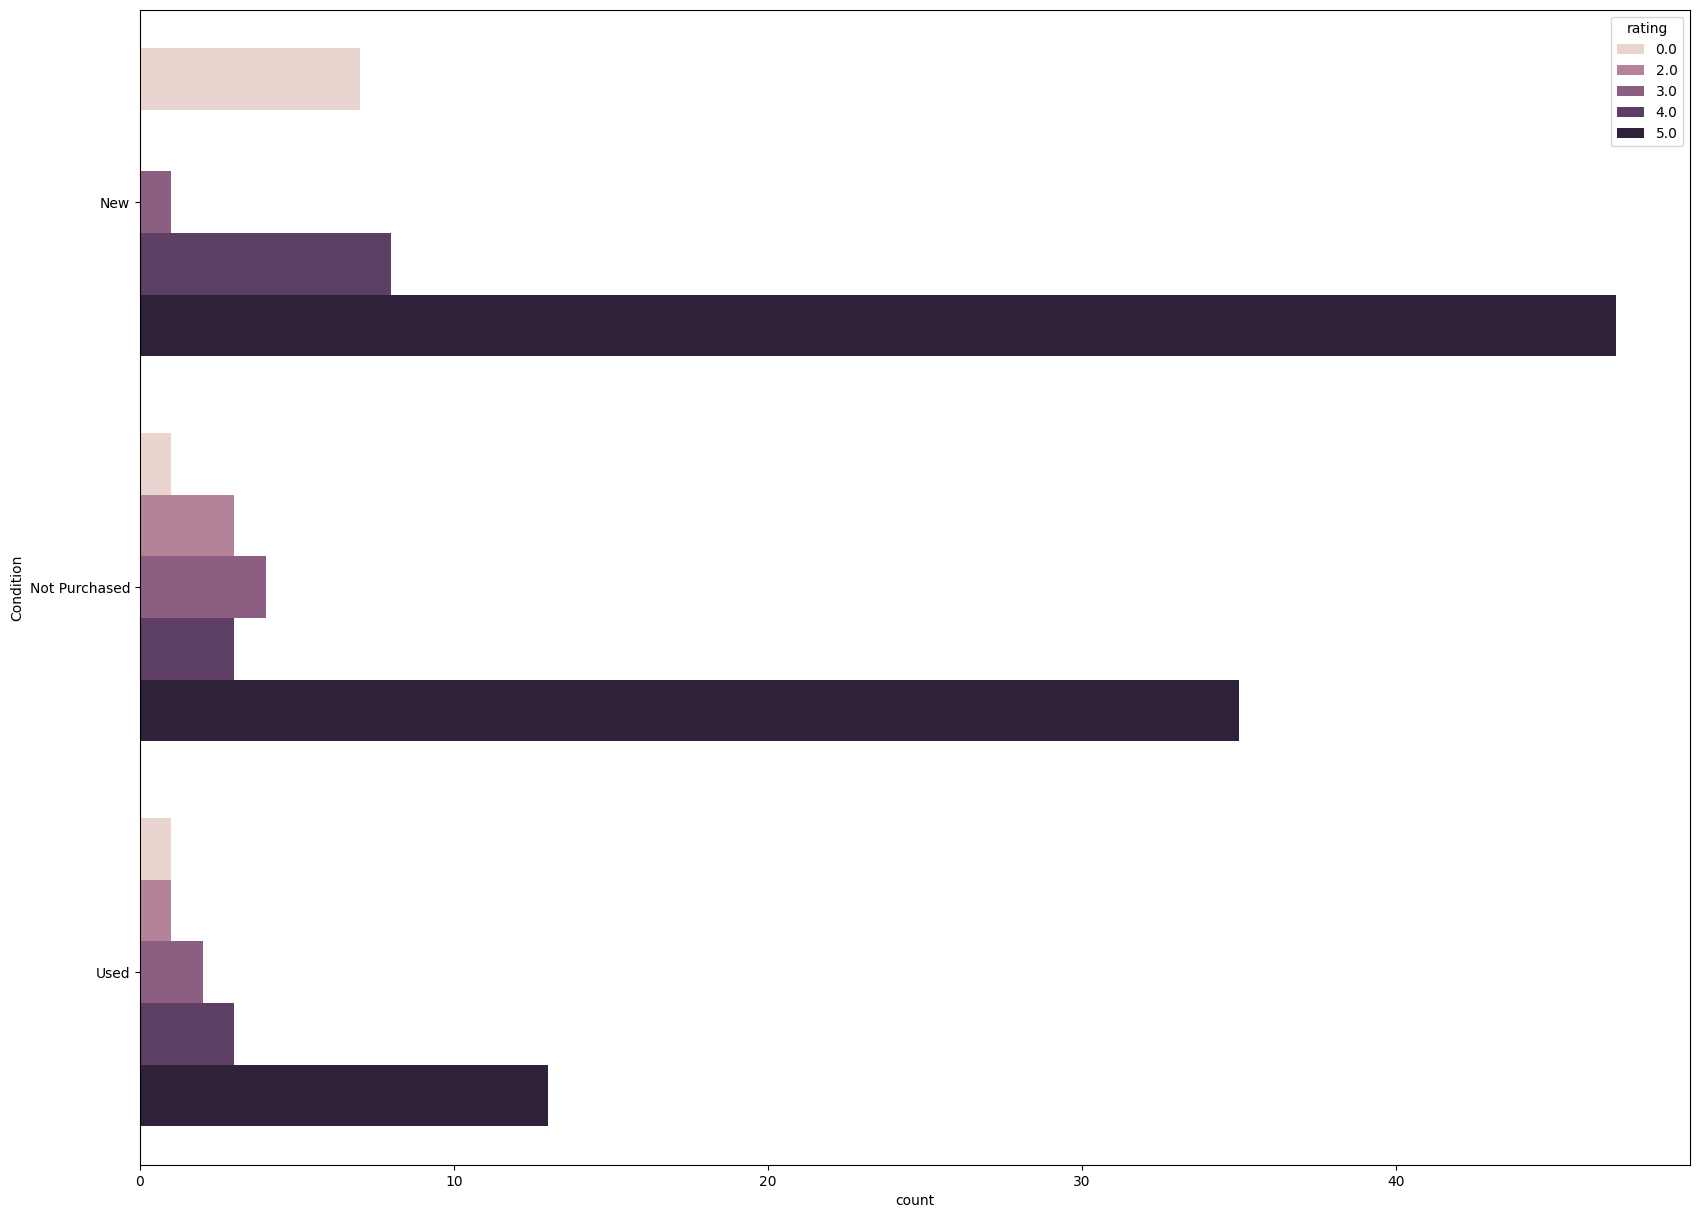

In [11]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Condition', data = df, hue='rating')

## Principal Component Analysis

In [12]:
columns = df.columns[1:6].values
values = df[columns].values

In [13]:
pca = PCA()

pca.fit_transform(values)
std = pca.components_.std(axis=0)
cumsumProportions = pca.explained_variance_ratio_.cumsum()

for idx in range(len(columns)):
    print("column: {} \n Standard Deviation: {} \n Proportion of Variance: {} \n Cumulative Proportion: {} \n\n".
    format(columns[idx], std[idx], pca.explained_variance_ratio_[idx], cumsumProportions[idx]))

column: Exterior 
 Standard Deviation: 0.34683721395155365 
 Proportion of Variance: 0.8389048691516312 
 Cumulative Proportion: 0.8389048691516312 


column: Comfort 
 Standard Deviation: 0.43902146192681035 
 Proportion of Variance: 0.06287861450724684 
 Cumulative Proportion: 0.9017834836588781 


column: Performance 
 Standard Deviation: 0.40048028135929864 
 Proportion of Variance: 0.044994311917413495 
 Cumulative Proportion: 0.9467777955762916 


column: Fuel Economy 
 Standard Deviation: 0.3833898257930928 
 Proportion of Variance: 0.034755109399117516 
 Cumulative Proportion: 0.9815329049754091 


column: Value for Money 
 Standard Deviation: 0.4237828320103226 
 Proportion of Variance: 0.018467095024590985 
 Cumulative Proportion: 1.0 




* The following command returns the factor loadings.
* The loadings indicate how the original variables are combined to form principal components.
* Loadings guide the interpretation of principal components.

In [14]:
pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)

,PC1,PC2,PC3,PC4,PC5
Exterior,-0.370159,0.504832,0.269510,0.385271,0.622139
Comfort,-0.413099,0.423520,0.139751,0.193792,-0.769997
Performance,-0.461816,0.133287,0.080588,-0.865190,0.117949
Fuel Economy,-0.437811,-0.063993,-0.880245,0.152519,0.078310
Value for Money,-0.536078,-0.737506,0.355679,0.205413,-0.001794


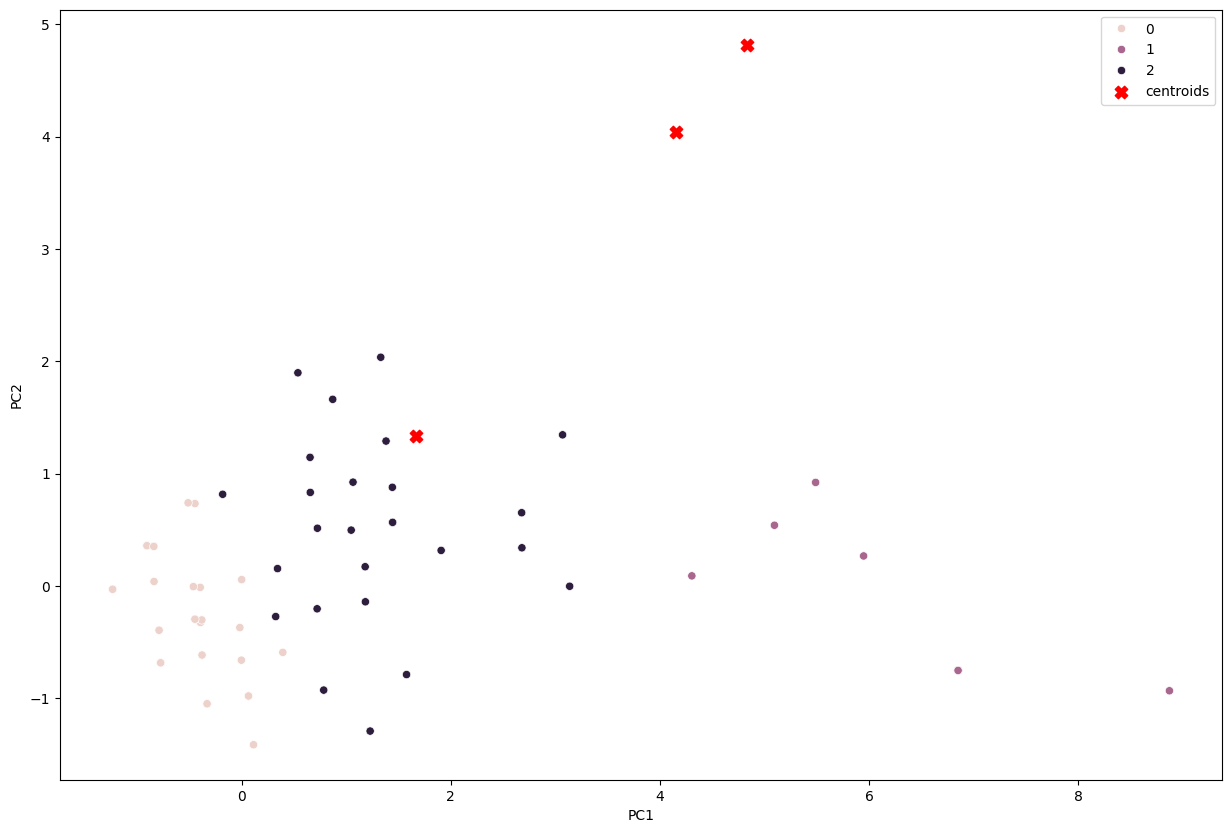

In [15]:
plt.figure(figsize=(15, 10))
kmeans = KMeans(3, random_state=0).fit(values)
scaled_data = StandardScaler().fit_transform(values)
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)

pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(len(columns))])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()

In [16]:
pca = PCA()
components = pca.fit_transform(values)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, title='Principal components analysis of the fast food data set')

for i, feature in enumerate(columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

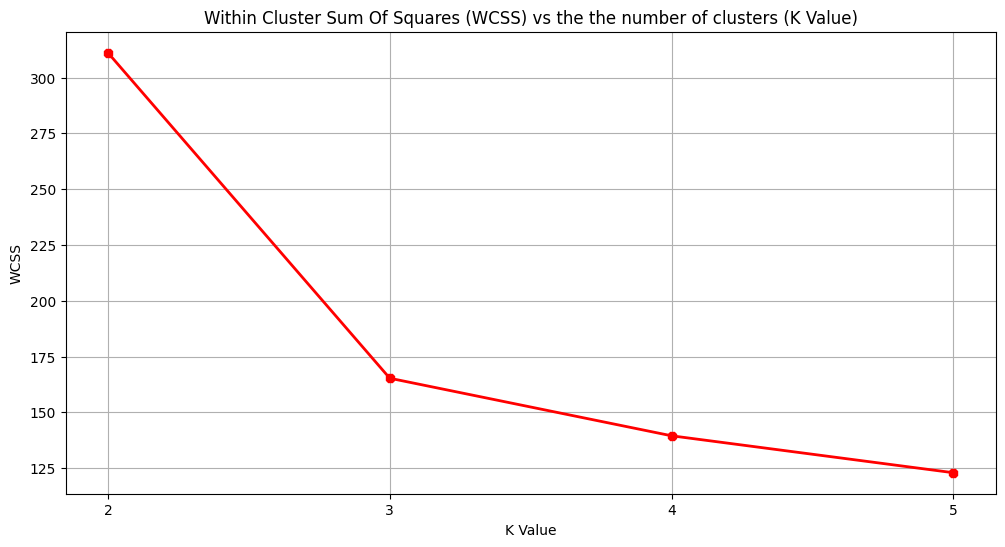

In [17]:
wcss = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,6),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,6,1))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()

* We clealry observe an elbow at k=3

## Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.7219919432326541
For n_clusters = 3 The average silhouette_score is : 0.6315470424676867
For n_clusters = 4 The average silhouette_score is : 0.5479325325802188
For n_clusters = 5 The average silhouette_score is : 0.542824572239918


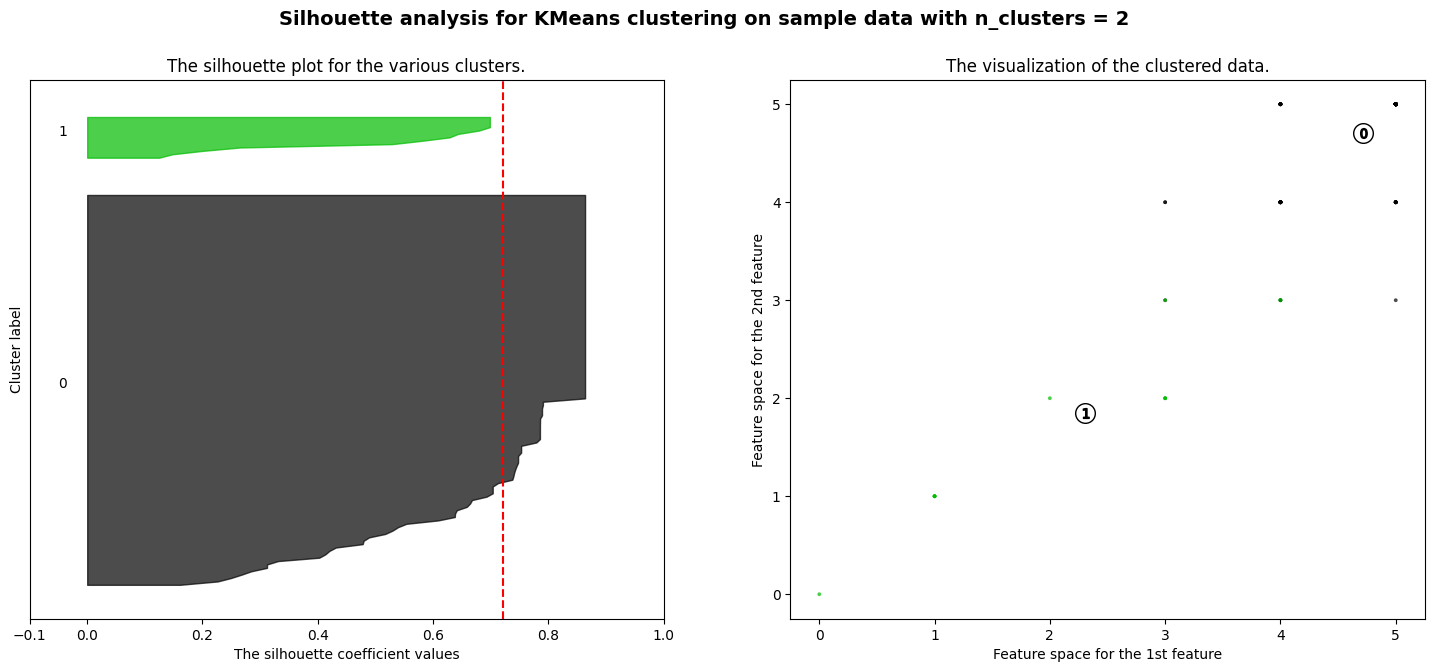

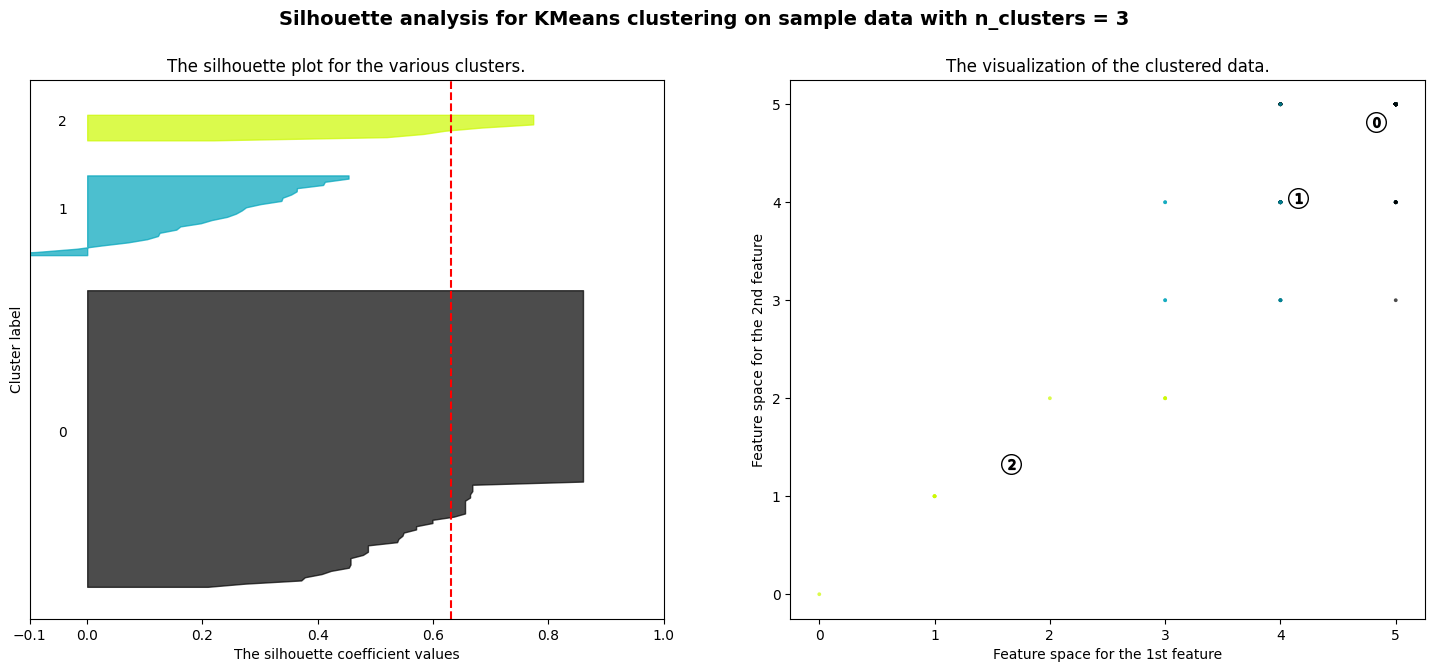

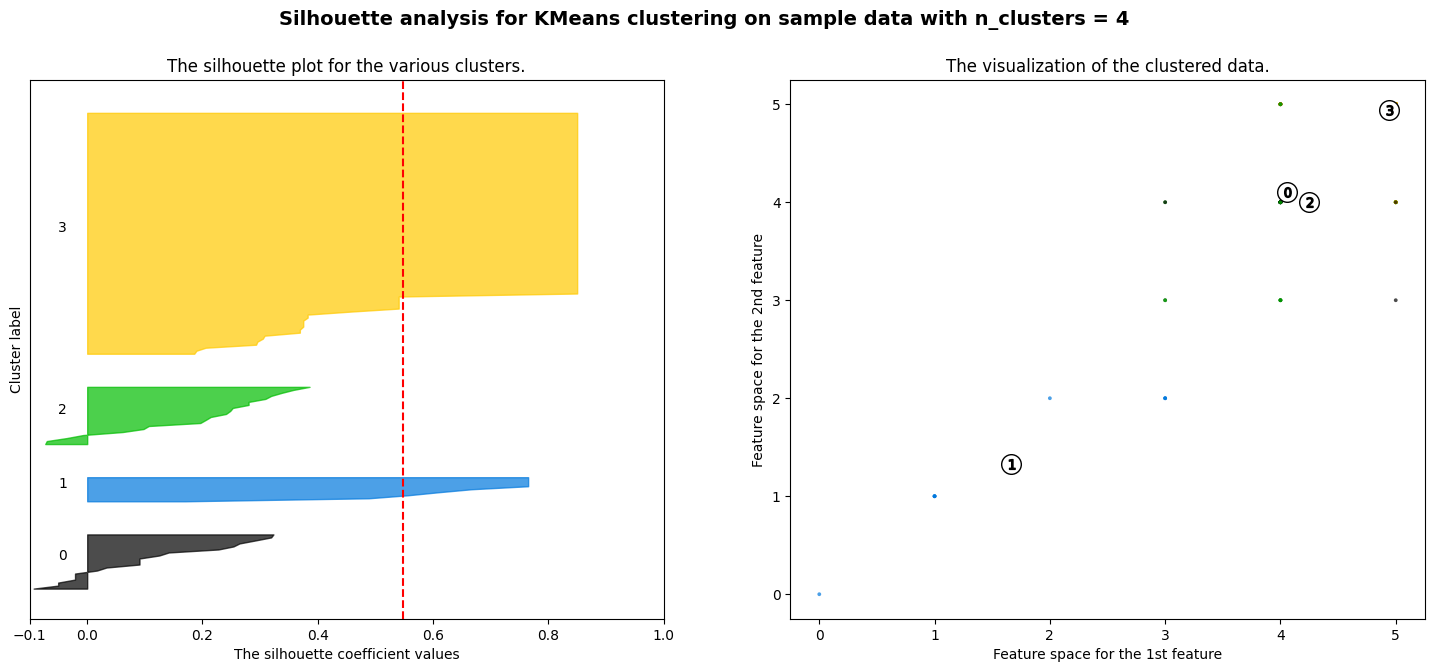

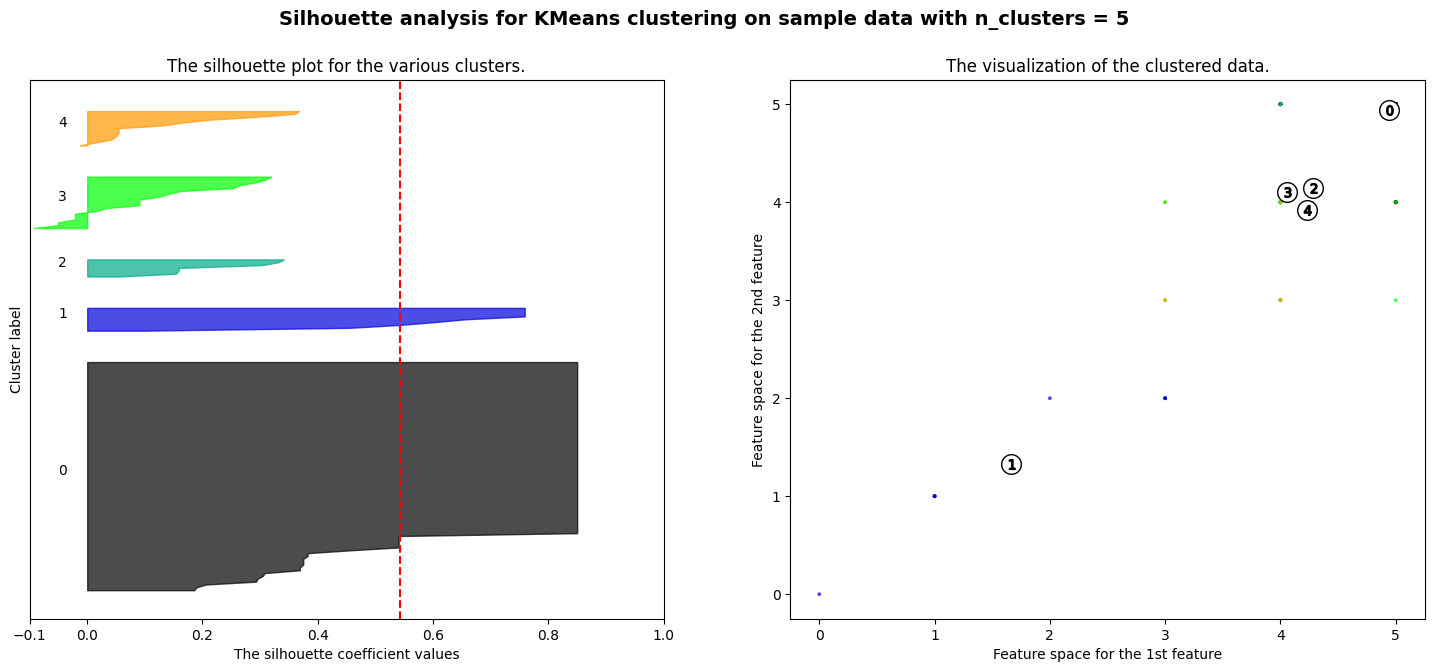

In [18]:
X = values

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2, 6)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* Number of clusters given by silhouette plot is 2

In [19]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(values, 200, axis=0)
kmeans.fit(X)

KMeans(n_clusters=3)

* Global stability of k-means segmentation solutions for the fast food data set

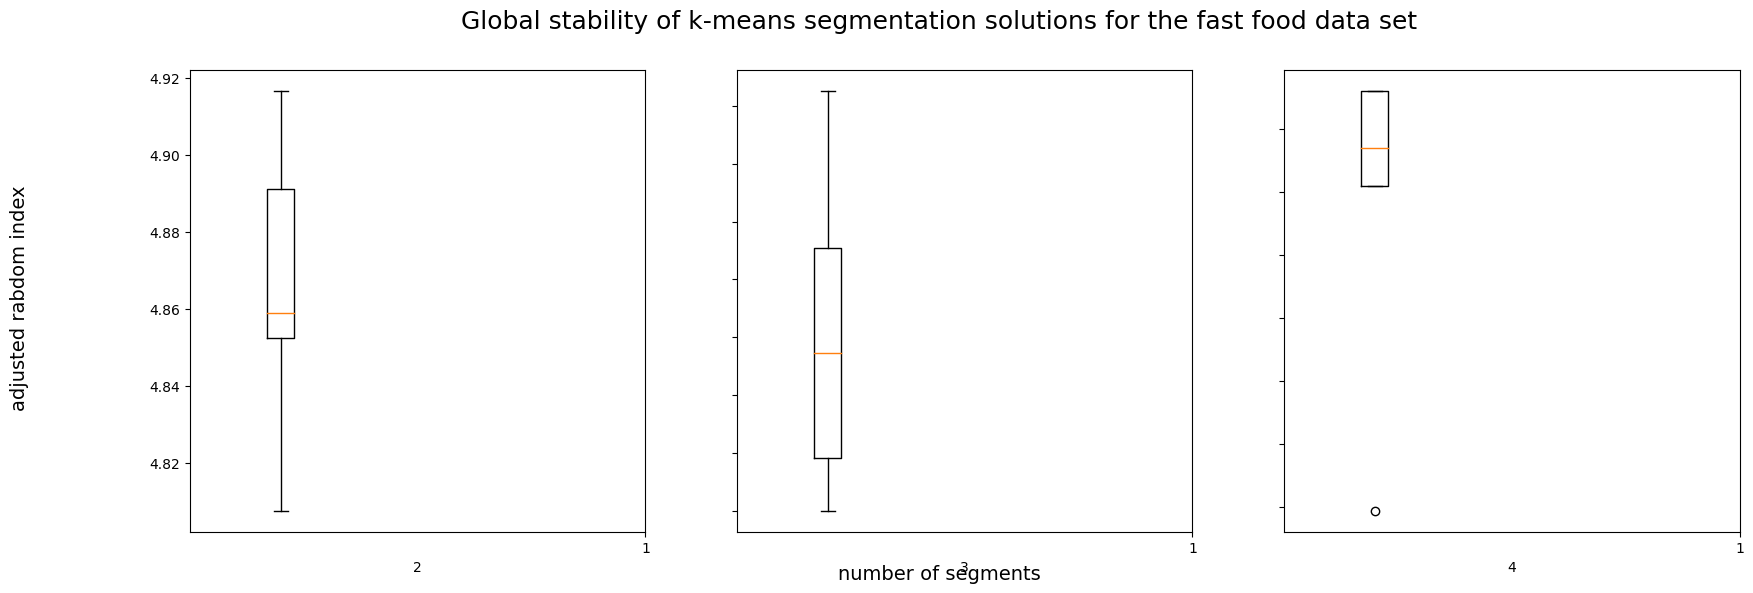

In [20]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions for the fast food data set', fontsize=18)

i=0


for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

## Using Mixtures of Regression Models

In [21]:
target = df['rating'].values

In [22]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 6):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, target.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))

For K : 2 	 convergence after: 10 iterations 
 

For K : 3 	 convergence after: 11 iterations 
 

For K : 4 	 convergence after: 11 iterations 
 

For K : 5 	 convergence after: 12 iterations 
 



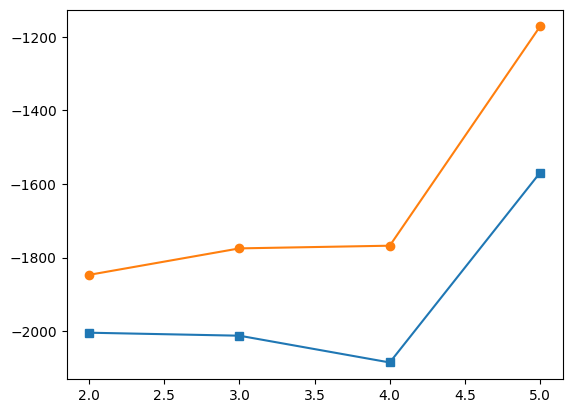

In [23]:
plt.plot(np.arange(2, 6), aic, marker = 's')
plt.plot(np.arange(2, 6), bic, marker = 'o')

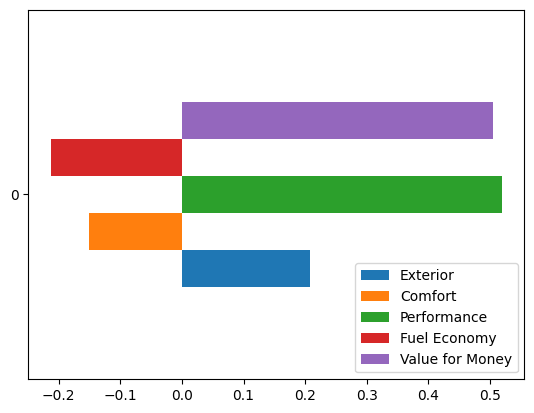

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(values, target)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()

## Step 6: Profiling Segments

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 2 clusters as shown in the following figure:

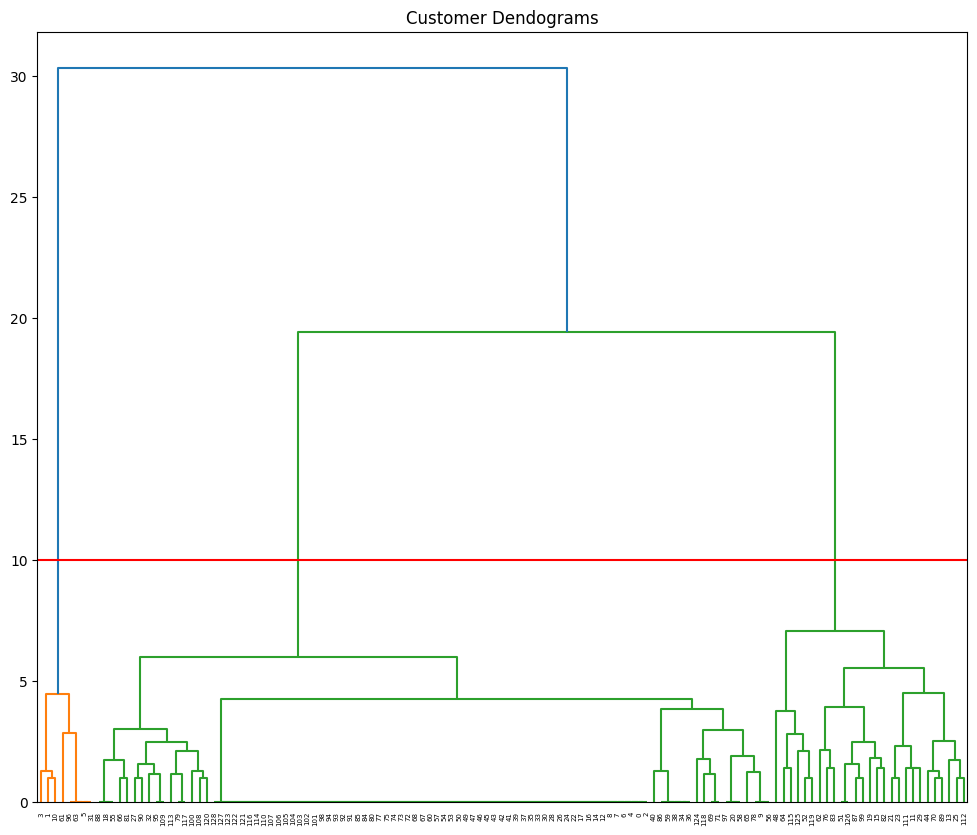

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.show()

* Number of clusters given by dendograms is 3

In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(values)

array([2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2])

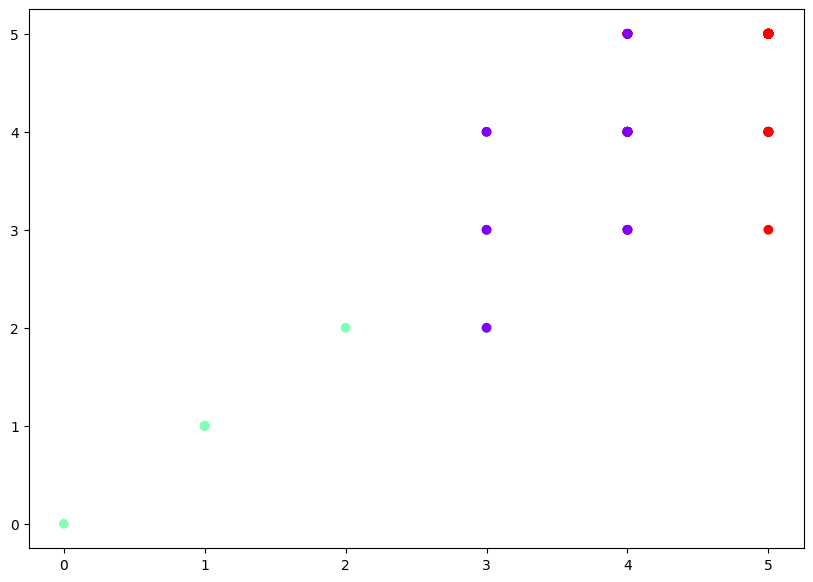

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(values[:,0], values[:,1], c=cluster.labels_, cmap='rainbow')

## Step 7: Describing Segments

In [28]:
from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(3, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

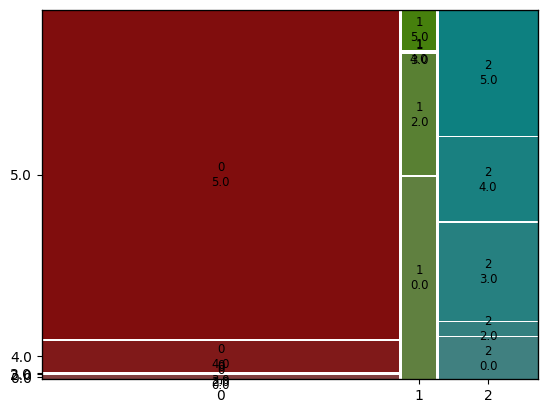

In [29]:
mosaic(crosstabLike.stack())
plt.show()

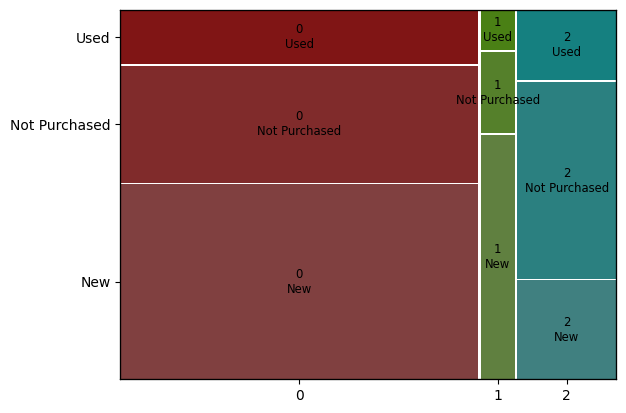

In [30]:
# Condition
crosstabCondition = pd.crosstab(kmeans.labels_, df['Condition'])
mosaic(crosstabCondition.stack())
plt.show()

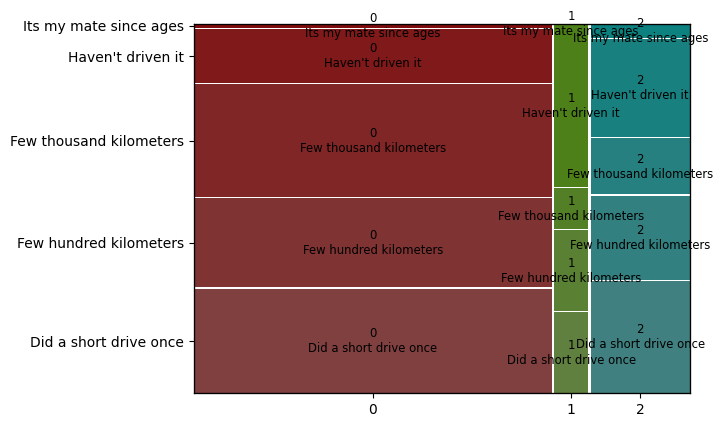

In [31]:
# Distance Driven
crosstabDriven = pd.crosstab(kmeans.labels_, df['driven'])
mosaic(crosstabDriven.stack())
plt.show()

## Step 8: Selecting the Target Segments

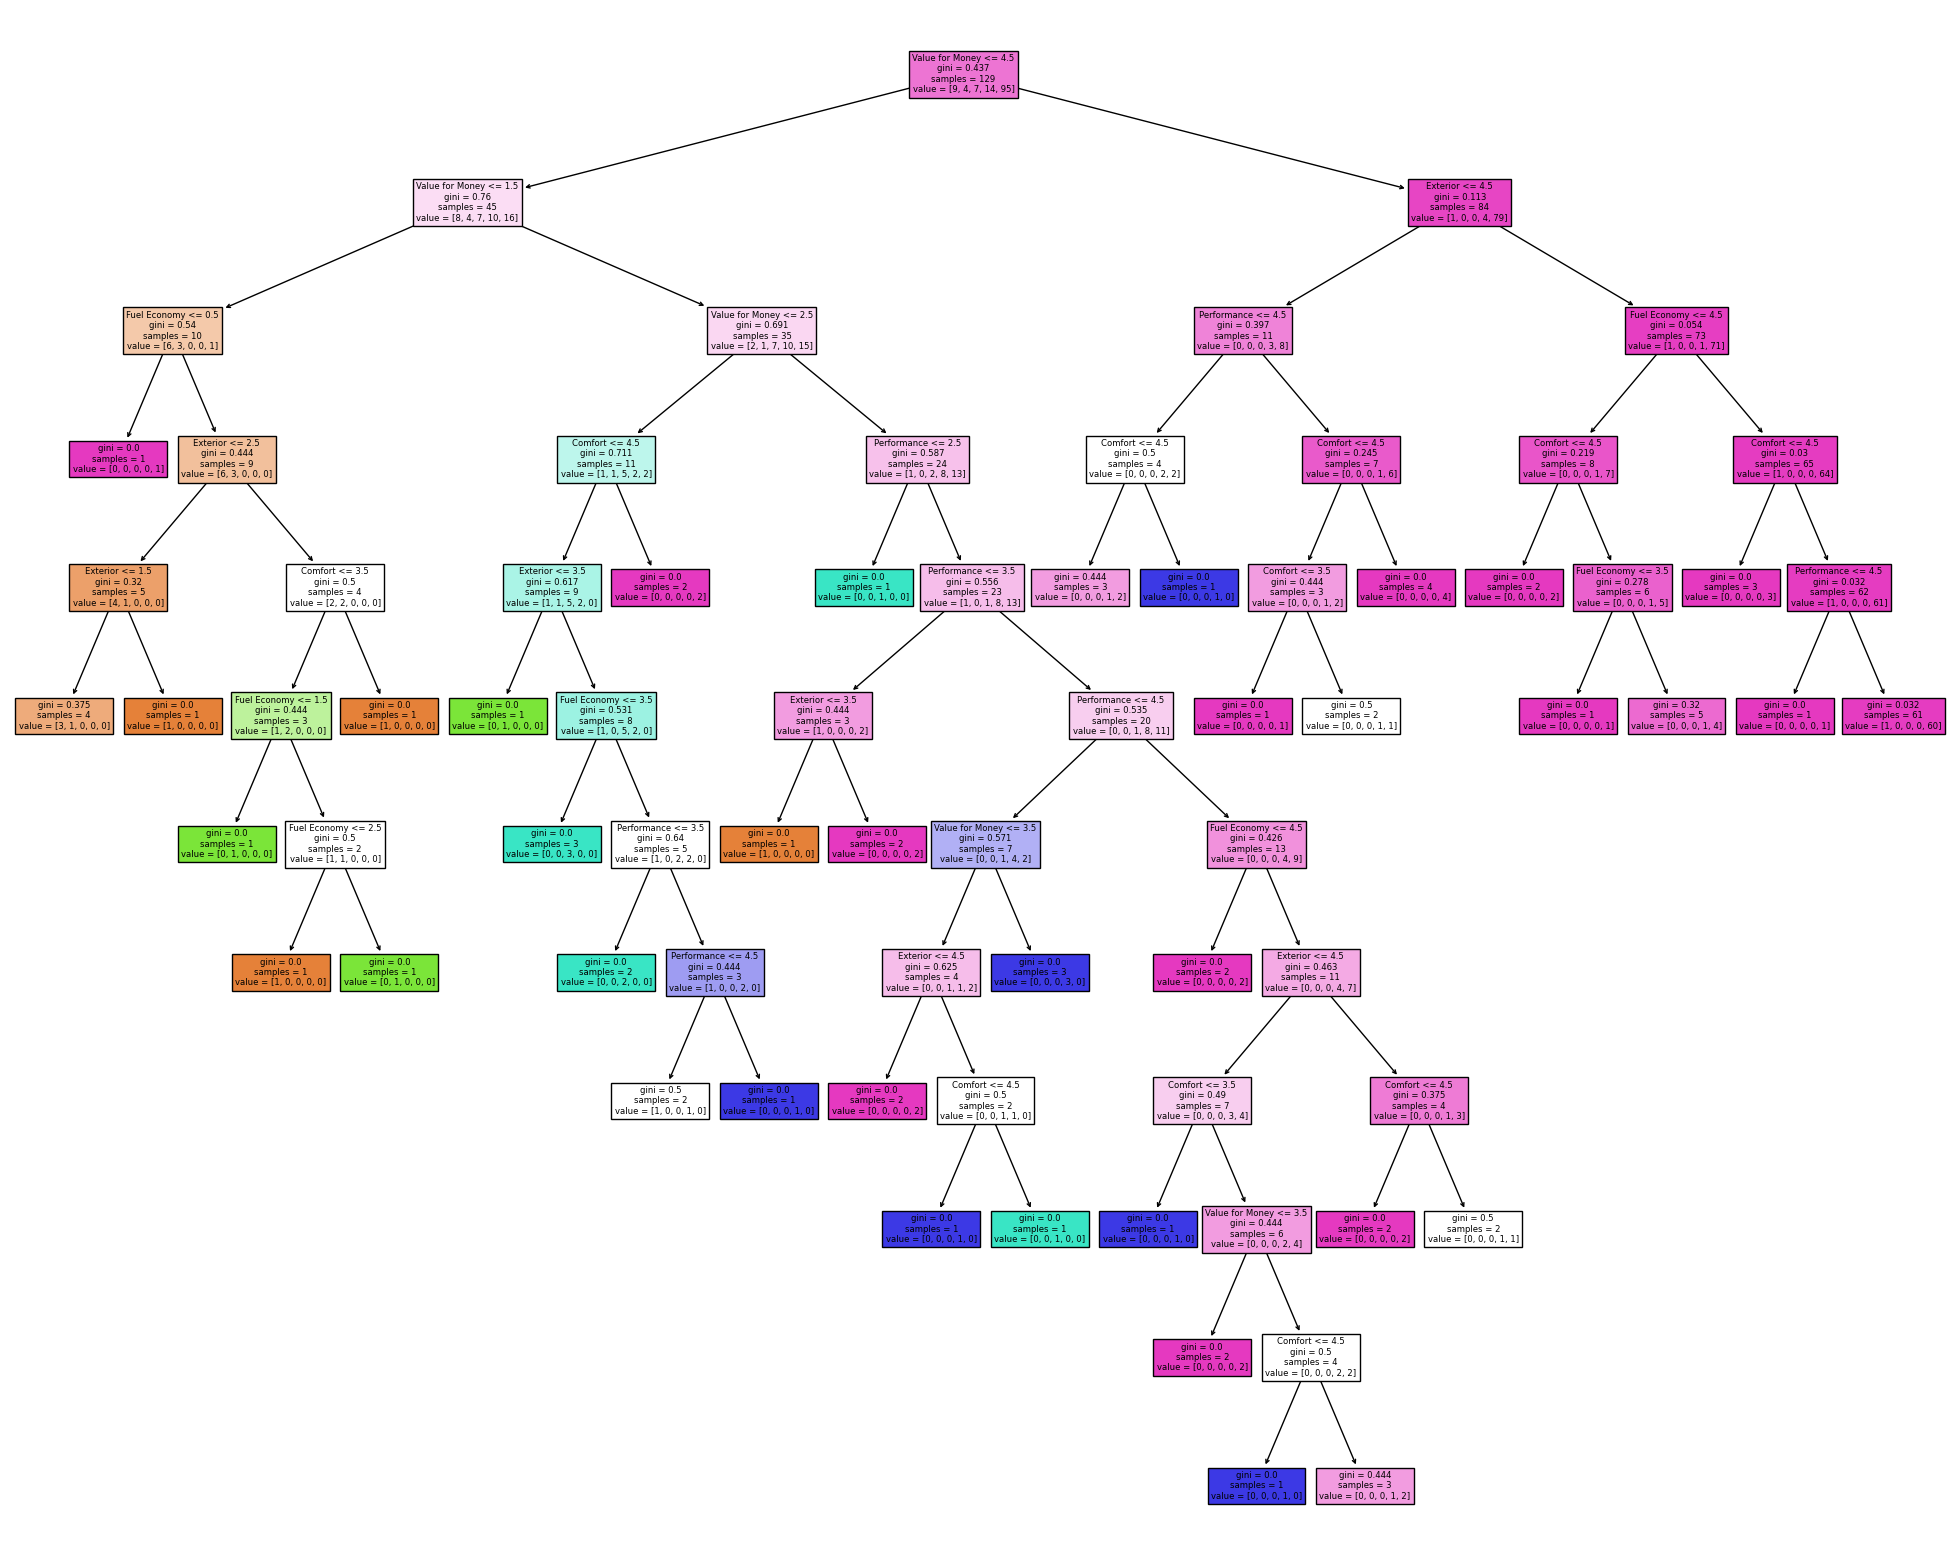

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier()
dtree.fit(values, target)



fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree,
                   feature_names=columns,
                   filled=True)